In [1]:
pip install CausalBootstrapping

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
import causalBootstrapping as cb

In [2]:
from distEst_lib import MultivarContiDistributionEstimator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

/var/folders/lr/j88t5txn53q1792_840bh3xr0000gp/T/ipykernel_44923/1354623847.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
import grapl.algorithms as algs
import grapl.dsl as dsl

causal_graph = '"Alcohol Consumption Causal Graph"; \
                D; F; S; A; P; M; N; J; K; G; H; \
                F -> D; \
                S -> D; \
                A -> D; \
                P -> D; \
                M -> D; \
                N -> D; \
                J -> D; \
                K -> D; \
                P -> F; \
                M -> F; \
                N -> F; \
                J -> F; \
                K -> F; \
                M -> J; \
                N -> K; \
                A -> H; \
                H -> D; \
                H -> G; \
                G -> D; '


grapl_obj = dsl.GraplDSL()
G = grapl_obj.readgrapl(causal_graph)
# Dalc(D); Famrel(F); Sex(S); Age(A); Pstatus(P); Medu(M); Fedu(N); Mjob(J); Fjob(K); Goout(G); Health(H)

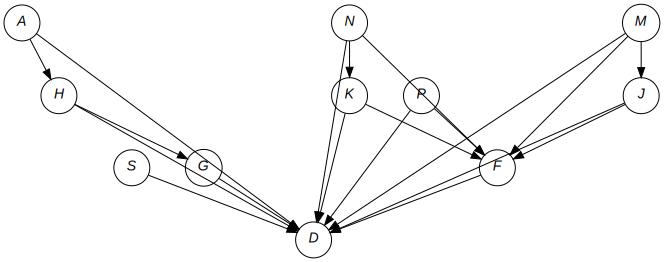

In [27]:
G

In [39]:
id_str, id_eqn, isident = algs.idfixing(G, {'H'}, {'D'})
id_str

"p_{H}(D)=\\sum_{G,P',A,S,H',K,J'',J,F,P,M,N,N'',N',A'',P'',J',A'}[p(G,A,S,D,H|N,J,F,P,K,M)p(G,S,H,A|P,M,K,N,J,F)p(G,S,H,A|N,J,F,P,K,M)p(G,H,A|P',K,M,N',F,J')p(G,S,H'|J'',F,M,K,P'',N)p(S,H,A''|J,F,P,N'',K,M)p(H,A|J'',F,P,M,K,N)p(A,J,P,F,M|N,K)p(P,N,M,K|H,A)p(S,M,N'',K|H,A')p(M,P',J'|N',K)p(P'',M,J''|N,K)p(P,M,J|N'',K)p(P,N,K|M,J)p(P,M,J''|N,K)p(P,N,K|M,J)p(P,M,J|N,K)p(N')p(A')p(N'')p(H')p(N'')p(A'')p(H)p(H)p(H)/p(H,A)p(G,H')p(N'',K)p(H,A'')p(H,A)p(G,H)p(H,A)p(G,H)p(H,A)p(H,A)p(M,J)p(N,K)p(G,H)p(N,K)p(M,J)p(M)p(P)p(M)p(S)p(M)p(S)p(P)p(M)p(P)p(S)p(M)p(S)p(P)p(S)p(P)p(P)]"

In [40]:
len(list(set(id_str.split('}')[2][1:-1].split('p')[1:])))


33

In [8]:
weight_func_lam, weight_func_str = cb.general_cb_analysis(causal_graph = causal_graph, 
                                                          effect_var_name = 'D', 
                                                          cause_var_name = 'H',
                                                          info_print = True,
                                                          idmode = "random",
                                                          idgreedy = True)

UnboundLocalError: cannot access local variable 'best_w_nom' where it is not associated with a value

In [64]:
from sklearn.preprocessing import OrdinalEncoder
import os
from sklearn.model_selection import train_test_split

# Load the dataset
total_data = pd.read_csv("./student-encoded.csv")
total_data.drop(labels = ['goout', 'health'], axis=1)
# Specify the desired features and target column
desired_features = ['sex', 'age', 'Pstatus','Medu','Fedu','famrel' ,'Mjob', 'Fjob', 'Dalc','Walc']
df = total_data[desired_features].copy()

df = pd.get_dummies(df, columns=['Mjob', 'Fjob'])

# target_column = df['Walc']
target_column = df['Dalc']
df

,sex,age,Pstatus,Medu,Fedu,famrel,Dalc,Walc,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,0.0,18,0.0,4,4,4,1,1,True,False,False,False,False,False,False,False,False,True
1,0.0,17,1.0,1,1,5,1,1,True,False,False,False,False,False,False,True,False,False
2,0.0,15,1.0,1,1,4,2,3,True,False,False,False,False,False,False,True,False,False
3,0.0,15,1.0,4,2,3,1,1,False,True,False,False,False,False,False,False,True,False
4,0.0,16,1.0,3,3,4,1,2,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.0,19,1.0,2,3,5,1,2,False,False,False,True,False,False,False,True,False,False
1040,0.0,18,1.0,3,1,4,1,1,False,False,False,False,True,False,False,False,True,False
1041,0.0,18,1.0,1,1,1,1,1,False,False,True,False,False,False,False,True,False,False
1042,1.0,17,1.0,3,1,2,3,4,False,False,False,True,False,False,False,False,True,False


In [65]:
# Create a file to save the split data
output_dir = "./split_data/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over each feature and split the dataset
for column in df.columns:
    # Get the data for the current feature
    feature_data = df[[column]]
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(feature_data, target_column, test_size=0.2, random_state=42)
    
    # Save the split training and testing sets as CSV files
    train_filename = os.path.join(output_dir, f"{column}_train.csv")
    test_filename = os.path.join(output_dir, f"{column}_test.csv")
    X_train.to_csv(train_filename, index=False)
    X_test.to_csv(test_filename, index=False)
    
    # Print the sizes of training and testing sets for each feature
    print(f"Feature: {column}")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")
    print("-----------")

Feature: sex
Training set size: 835
Testing set size: 209
-----------
Feature: age
Training set size: 835
Testing set size: 209
-----------
Feature: Pstatus
Training set size: 835
Testing set size: 209
-----------
Feature: Medu
Training set size: 835
Testing set size: 209
-----------
Feature: Fedu
Training set size: 835
Testing set size: 209
-----------
Feature: famrel
Training set size: 835
Testing set size: 209
-----------
Feature: Dalc
Training set size: 835
Testing set size: 209
-----------
Feature: Walc
Training set size: 835
Testing set size: 209
-----------
Feature: Mjob_at_home
Training set size: 835
Testing set size: 209
-----------
Feature: Mjob_health
Training set size: 835
Testing set size: 209
-----------
Feature: Mjob_other
Training set size: 835
Testing set size: 209
-----------
Feature: Mjob_services
Training set size: 835
Testing set size: 209
-----------
Feature: Mjob_teacher
Training set size: 835
Testing set size: 209
-----------
Feature: Fjob_at_home
Training set s

In [43]:
total_data = df
total_data[['Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher']]

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
1039,False,False,False,True,False
1040,False,False,False,False,True
1041,False,False,True,False,False
1042,False,False,False,True,False


In [66]:
# Dalc(D); Famrel(F); Sex(S); Age(A); Pstatus(P); Medu(M); Fedu(N); Mjob(J); Fjob(K)
# Read demo data
testdata_dir = "./split_data/"
D_train = pd.read_csv(testdata_dir + "Dalc_train.csv")
# D_train = pd.read_csv(testdata_dir + "Walc_train.csv")
F_train = pd.read_csv(testdata_dir + "famrel_train.csv")
S_train = pd.read_csv(testdata_dir + "sex_train.csv")
A_train = pd.read_csv(testdata_dir + "age_train.csv")
P_train = pd.read_csv(testdata_dir + "Pstatus_train.csv")
M_train = pd.read_csv(testdata_dir + "Medu_train.csv")
N_train = pd.read_csv(testdata_dir + "Fedu_train.csv")

Jathome_train = pd.read_csv(testdata_dir + "Mjob_at_home_train.csv")
Jhealth_train = pd.read_csv(testdata_dir + "Mjob_health_train.csv")
Jother_train = pd.read_csv(testdata_dir + "Mjob_other_train.csv")
Jservices_train = pd.read_csv(testdata_dir + "Mjob_services_train.csv")
Jteacher_train = pd.read_csv(testdata_dir + "Mjob_teacher_train.csv")
Kathome_train = pd.read_csv(testdata_dir + "Fjob_at_home_train.csv")
Khealth_train = pd.read_csv(testdata_dir + "Fjob_health_train.csv")
Kother_train = pd.read_csv(testdata_dir + "Fjob_other_train.csv")
Kservices_train = pd.read_csv(testdata_dir + "Fjob_services_train.csv")
Kteacher_train = pd.read_csv(testdata_dir + "Fjob_teacher_train.csv")

J_train = pd.concat([Jathome_train, Jhealth_train, Jother_train, Jservices_train, Jteacher_train], axis=1)
K_train = pd.concat([Kathome_train, Khealth_train, Kother_train, Kservices_train, Kteacher_train], axis=1)

# Reform the data to the acceptable format for the causalbootstrapping interfaces
D_train = np.array(D_train)
F_train = np.array(F_train)
S_train = np.array(S_train)
A_train = np.array(A_train)
P_train = np.array(P_train)
M_train = np.array(M_train)
N_train = np.array(N_train)
J_train = np.array(J_train)
K_train = np.array(K_train)

data = {"D'": D_train,
        "F": F_train,
        "S": S_train,
        "A": A_train,
        "P": P_train,
        "M": M_train,
        "N": N_train,
        "J": J_train,
        "K": K_train}

In [67]:
# Interventional prob.:p_{S}(D)=\sum_{N,P,K,A,J,M}[p(M,P,A,J,S,D|N,K)p(N,P,K,A,S|J,M)/p(S)p(P)p(S)p(A)]
# Causal bootstrapping weights function: [P(A,J,K,M,N,P,S)K(S,S')]/N*[P(S)P(P)P(K,N)P(S)P(A)P(J,M)]
# Required distributions:
# 1: P(A,J,K,M,N,P,S)
# 2: P(S)
# 3: P(P)
# 4: P(K,N)
# 5: P(S)
# 6: P(A)
# 7: P(J,M)
# Kernel function required: K(S,S')

In [68]:
# Set number of the bins for histogram becasue all variables follow discrete distributions.

# Number of zeros depends on the dimension of the feature
n_bins_ajkmnps = [3,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
n_bins_kn = [0,0,0,0,0,0]
n_bins_jm = [0,0,0,0,0,0]
n_bins_s = [0]
n_bins_p = [0]
n_bins_a = [0]

data_ajkmnps = np.concatenate((A_train, J_train, K_train, M_train, N_train, P_train,S_train),axis=1)
#data_ajkmnps = np.concatenate((A_train, J_train.reshape(-1,1), K_train.reshape(-1,1), M_train, N_train, P_train,S_train))
data_kn = np.concatenate((K_train.reshape(-1,1), N_train))
data_jm = np.concatenate((J_train.reshape(-1,1), M_train))
data_s = S_train
data_p = P_train
data_a = A_train
code = """
ddd
ddd
dd
"""
eval()
# TODO: Change it to the new distribution
dist_estimator_ajkmnps = MultivarContiDistributionEstimator(data_fit=data_ajkmnps, n_bins = n_bins_ajkmnps)
pdf_ajkmnps, pajkmnps = dist_estimator_ajkmnps.fit_histogram()
dist_estimator_kn = MultivarContiDistributionEstimator(data_fit=data_kn, n_bins = n_bins_kn)
pdf_kn, pkn = dist_estimator_kn.fit_histogram()
dist_estimator_jm = MultivarContiDistributionEstimator(data_fit=data_jm, n_bins = n_bins_jm)
pdf_jm, pjm = dist_estimator_jm.fit_histogram()
dist_estimator_s = MultivarContiDistributionEstimator(data_fit=data_s, n_bins = n_bins_s)
pdf_s, ps = dist_estimator_s.fit_histogram()
dist_estimator_p = MultivarContiDistributionEstimator(data_fit=data_p, n_bins = n_bins_p)
pdf_p, pp = dist_estimator_p.fit_histogram()
dist_estimator_a = MultivarContiDistributionEstimator(data_fit=data_a, n_bins = n_bins_a)
pdf_a, pa = dist_estimator_a.fit_histogram()

dist_map = {tuple(sorted(["A", "J", "K", "M", "N", "P", "S"])): lambda A, J, K, M, N, P, S: pdf_ajkmnps([A, J, K, M, N, P, S]) ,
            tuple(sorted(["K","N"])): lambda K, N: pdf_kn([K, N]),
            tuple(sorted(["J","M"])): lambda J, M: pdf_jm([J, M]),
            tuple(sorted(["S"])): lambda S: pdf_s([S]),
            tuple(sorted(["P"])): lambda P: pdf_p([P]),
            tuple(sorted(["A"])): lambda A: pdf_a([A])}

SS = eval("lambda "+ "D" +","+ "S" +": 1 if "+ "D" +"==" + "S" + " else 0")

In [69]:
cb_data = cb.general_causal_bootstrapping_simple(weight_func_lam = weight_func_lam, 
                                                 dist_map = dist_map, data = data, 
                                                 intv_var_name = "S", kernel = SS)

In [70]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
# clf_conf = svm.SVC(kernel = 'linear', C=2)
clf_conf = XGBClassifier()
clf_conf.fit(D_train, S_train)

# clf_cb = svm.SVC(kernel = 'linear', C=2)
clf_cb = XGBClassifier()
clf_cb.fit(cb_data['D'], cb_data["intv_S"])

D_test = pd.read_csv(testdata_dir +  "Dalc_test.csv")
# D_test = pd.read_csv(testdata_dir + "Walc_test.csv")
S_test = pd.read_csv(testdata_dir +  "sex_test.csv")
D_test = np.array(D_test)
S_test = np.array(S_test)

S_pred_conf = clf_conf.predict(S_test)
print("Report of confonded model:")
print(classification_report(S_test, S_pred_conf))
print(accuracy_score(S_test, S_pred_conf), recall_score(S_test, S_pred_conf, average="weighted"), f1_score(S_test, S_pred_conf, average='weighted'))

S_pred_deconf = clf_cb.predict(D_test)
print("Report of de-confonded model:")
print(classification_report(S_test, S_pred_deconf))
print(accuracy_score(S_test, S_pred_deconf), recall_score(S_test, S_pred_deconf, average='weighted'), f1_score(S_test, S_pred_deconf, average='weighted'))

Report of confonded model:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       127
         1.0       0.00      0.00      0.00        82

    accuracy                           0.61       209
   macro avg       0.30      0.50      0.38       209
weighted avg       0.37      0.61      0.46       209

0.6076555023923444 0.6076555023923444 0.459358623832308
Report of de-confonded model:
              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76       127
         1.0       0.63      0.41      0.50        82

    accuracy                           0.67       209
   macro avg       0.66      0.63      0.63       209
weighted avg       0.67      0.67      0.66       209

0.6746411483253588 0.6746411483253588 0.6573008924632665


/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [49]:
# Use kde to estimate
dist_estimator_ajkmnps = MultivarContiDistributionEstimator(data_fit=data_ajkmnps, n_bins = n_bins_ajkmnps)
pdf_ajkmnps, pajkmnps = dist_estimator_ajkmnps.fit_kde()
dist_estimator_kn = MultivarContiDistributionEstimator(data_fit=data_kn, n_bins = n_bins_kn)
pdf_kn, pkn = dist_estimator_kn.fit_kde()
dist_estimator_jm = MultivarContiDistributionEstimator(data_fit=data_jm, n_bins = n_bins_jm)
pdf_jm, pjm = dist_estimator_jm.fit_kde()
dist_estimator_s = MultivarContiDistributionEstimator(data_fit=data_s, n_bins = n_bins_s)
pdf_s, ps = dist_estimator_s.fit_kde()
dist_estimator_p = MultivarContiDistributionEstimator(data_fit=data_p, n_bins = n_bins_p)
pdf_p, pp = dist_estimator_p.fit_kde()
dist_estimator_a = MultivarContiDistributionEstimator(data_fit=data_a, n_bins = n_bins_a)
pdf_a, pa = dist_estimator_a.fit_kde()

dist_map = {tuple(sorted(["A", "J", "K", "M", "N", "P", "S"])): lambda A, J, K, M, N, P, S: pdf_ajkmnps([A, J, K, M, N, P, S]) ,
            tuple(sorted(["K","N"])): lambda K, N: pdf_kn([K, N]),
            tuple(sorted(["J","M"])): lambda J, M: pdf_jm([J, M]),
            tuple(sorted(["S"])): lambda S: pdf_s([S]),
            tuple(sorted(["P"])): lambda P: pdf_p([P]),
            tuple(sorted(["A"])): lambda A: pdf_a([A])}

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

In [40]:
data_ajkmnps = np.concatenate((A_train, J_train, K_train, M_train, N_train, P_train,S_train),axis=1)

data_ajkmnps

array([[16.,  1.,  0., ...,  1.,  1.,  1.],
       [17.,  0.,  0., ...,  2.,  1.,  0.],
       [19.,  0.,  0., ...,  1.,  1.,  1.],
       ...,
       [15.,  0.,  0., ...,  2.,  1.,  1.],
       [15.,  0.,  0., ...,  2.,  1.,  1.],
       [18.,  0.,  0., ...,  2.,  1.,  0.]])

In [21]:
cb_data = cb.general_causal_bootstrapping_simple(weight_func_lam = weight_func_lam, 
                                                 dist_map = dist_map, data = data, 
                                                 intv_var_name = "S", kernel = SS)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (7,) + inhomogeneous part.